# INTRODUCTION

Do the analysis to find the best location to start a salon business
of beauty in Guayaquil how many clients could be captured in each sector and what type of
service would have more clients:

Tipo de servicio
barbero
manicure-pedicure
corte pelo
blower

sector
norte
sur
centro




# DATA

In [ ]:

table of statistics of sectors north central south
of people living in certain sectors to
determine what type of service they use the most from a beauty salon

In [140]:
import pandas as pd
df = pd.read_csv('C:\coursera\machine learning\proyecto final\datos.csv', sep=';')
df.head()

,sector,edad,sexo,tipo servicio
0,norte,20,M,Barbero
1,sur,12,F,manicure-pedicure
2,centro,15,F,manicure-pedicure
3,norte,40,F,manicure-pedicure
4,centro,30,M,corte pelo


# Methodology 


Machine learning K Nearest Neighbor (KNN) was used

to predict the type that customers will use the most

In [108]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

#df.shape


In [82]:
!conda install -c anaconda seaborn -y

Solving environment: ...working... done

# All requested packages already installed.



In [109]:
df['tipo servicio'].value_counts()

manicure-pedicure    8
Barbero              5
corte pelo           4
blower               1
Name: tipo servicio, dtype: int64

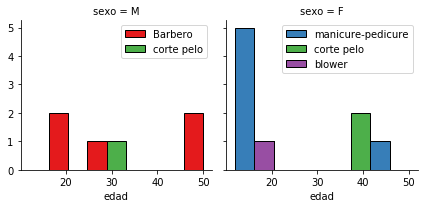

In [110]:

bins = np.linspace(df.edad.min(), df.edad.max(), 10)
g = sns.FacetGrid(df, col="sexo", hue="tipo servicio", palette="Set1", col_wrap=2)
g.map(plt.hist, 'edad', bins=bins, ec="k")

g.axes[0].legend()
g.axes[-1].legend()
plt.show()

In [111]:
df.groupby(['sexo'])['tipo servicio'].value_counts(normalize=True)

sexo  tipo servicio    
F     manicure-pedicure    0.666667
      corte pelo           0.250000
      blower               0.083333
M     Barbero              0.833333
      corte pelo           0.166667
Name: tipo servicio, dtype: float64

In [133]:
Feature = df
Feature

,sector,edad,sexo,tipo servicio
0,norte,20,M,Barbero
1,sur,12,F,manicure-pedicure
2,centro,15,F,manicure-pedicure
3,norte,40,F,manicure-pedicure
4,centro,30,M,corte pelo
5,sur,20,F,blower
6,norte,20,M,Barbero
7,sur,12,F,manicure-pedicure
8,centro,15,F,manicure-pedicure
9,norte,40,F,corte pelo


In [115]:
df['sexo'].replace(to_replace=['M','F'], value=[0,1],inplace=True)
df.head()



,sector,edad,sexo,tipo servicio
0,norte,20,0,Barbero
1,sur,12,1,manicure-pedicure
2,centro,15,1,manicure-pedicure
3,norte,40,1,manicure-pedicure
4,centro,30,0,corte pelo


In [116]:
df['sector'].replace(to_replace=['norte','sur','centro'], value=[0,1,2],inplace=True)
df.head()



,sector,edad,sexo,tipo servicio
0,0,20,0,Barbero
1,1,12,1,manicure-pedicure
2,2,15,1,manicure-pedicure
3,0,40,1,manicure-pedicure
4,2,30,0,corte pelo


In [117]:
df['tipo servicio'].replace(to_replace=['Barbero','manicure-pedicure','corte pelo','blower'], value=[0,1,2,3],inplace=True)
df.head()

,sector,edad,sexo,tipo servicio
0,0,20,0,0
1,1,12,1,1
2,2,15,1,1
3,0,40,1,1
4,2,30,0,2


In [118]:
X = Feature
X[0:5]

,sector,edad,sexo,tipo servicio
0,0,20,0,0
1,1,12,1,1
2,2,15,1,1
3,0,40,1,1
4,2,30,0,2


In [119]:
y = df['tipo servicio'].values
y[0:5]

array([0, 1, 1, 1, 2], dtype=int64)

In [120]:
X= preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]


array([[-1.22474487, -0.53254229, -1.41421356, -1.24473139],
       [ 0.        , -1.14116204,  0.70710678, -0.06551218],
       [ 1.22474487, -0.91292963,  0.70710678, -0.06551218],
       [-1.22474487,  0.9890071 ,  0.70710678, -0.06551218],
       [ 1.22474487,  0.22823241, -1.41421356,  1.11370703]])

In [121]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split (X,y,test_size = 0.2, random_state = 4)
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (14, 4) (14,)
Test set: (4, 4) (4,)


In [122]:
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
#Find the best k using accuracy score:
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

    mean_acc
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1)

The best accuracy was with 0.75 with k= 4


In [137]:
k = 4
#Train our model: 
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
#Predict 

print(yhat[0:5])
# el tipo 1  es manicure pedicure es la predicción que mas   servicio va a tener en el negocio

#tipo  de servicio
print(y[0:5])
#tipo servicio 0
#'Barbero','manicure-pedicure','corte pelo','blower'], value=[0,1,2,3]
print(Feature[0:5])

[1 1 1 1]
[0 1 1 1 2]
   sector  edad sexo      tipo servicio
0   norte    20    M            Barbero
1     sur    12    F  manicure-pedicure
2  centro    15    F  manicure-pedicure
3   norte    40    F  manicure-pedicure
4  centro    30    M         corte pelo


# Results 

In [ ]:

indicating the prediction that the type of manicure-pedicure service is going to
be the most used

# Discussion

You have to do more data collection and verify in central places where more people go who can become future customers

# Conclusion

As a conclusion, based on the data collected, the women manicure service will be consumed more, it must try to offer more services and perform new data collection for its analysis and improve the types of services offered.